In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r"C:\Users\hiten\Downloads\Python\Oasis Infobyte Intership\Customer Segmentation\ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [28]:
df.columns


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [30]:
## There are 2205 records (rows) and 39 columns

In [31]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [32]:
# As we can see there is no Missing Values

In [33]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [34]:
## Columns Z_CostContact and Z_Revenue have all the same values. 
## These columns will not help us to understand our customers better. We can drop these columns from the data frame.

In [35]:
df = df.drop(['Z_CostContact','Z_Revenue'],axis = 1)

In [45]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


# Data Exploration

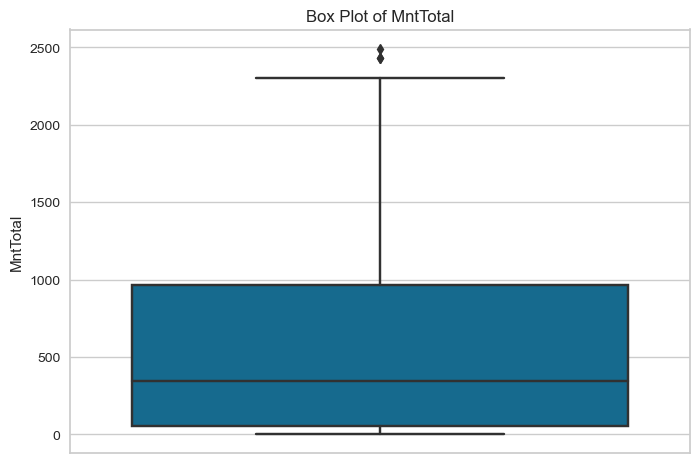

In [36]:
sns.boxplot(data = df, y = 'MntTotal')
plt.title('Box Plot of MntTotal')
plt.show()

In [37]:
for i in ['MntTotal']:
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3+1.5*iqr
    ll = q1- 1.5*iqr
    df[i].clip(lower=ll,upper=ul,inplace=True)

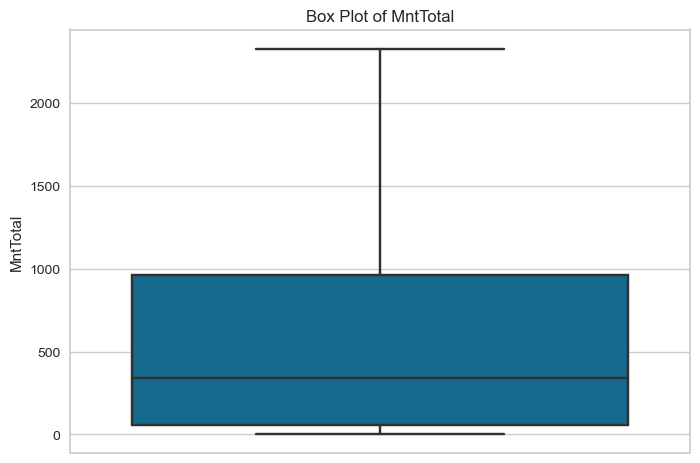

In [38]:
sns.boxplot(data = df, y = 'MntTotal')
plt.title('Box Plot of MntTotal')
plt.show()

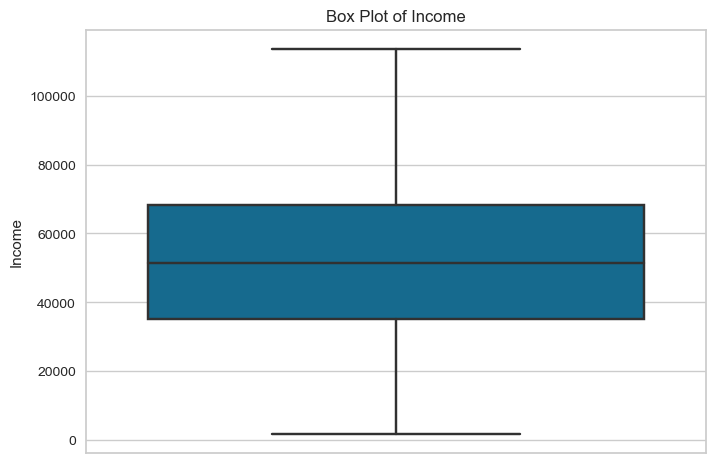

In [39]:
sns.boxplot(data = df, y = 'Income')
plt.title('Box Plot of Income')
plt.show()

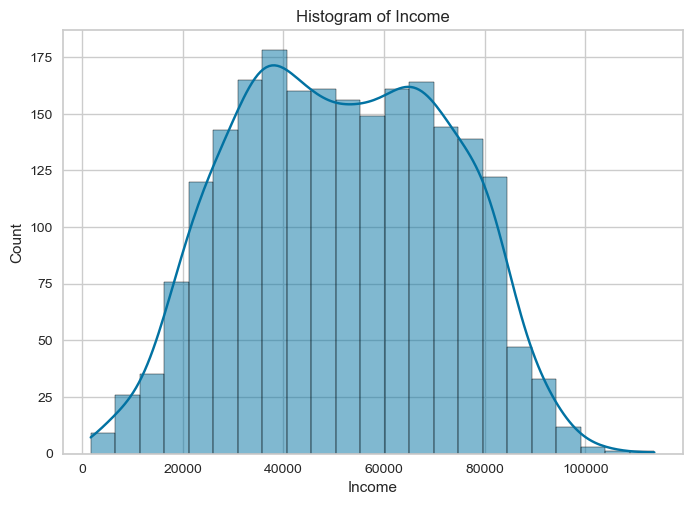

In [40]:
sns.histplot(data = df,x = 'Income',kde=True)
plt.title("Histogram of Income")
plt.show()

# Standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,2.416812e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.710131e-01,-1.347625e+00
25%,-7.932106e-01,-8.806210e-01,-1.347625e+00
50%,-1.618161e-02,-3.817263e-01,7.420464e-01
75%,8.044529e-01,6.977635e-01,7.420464e-01
max,2.999363e+00,3.065340e+00,7.420464e-01


# Principal Component Analysis (PCA)

In [47]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

###  Elbow Method 
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

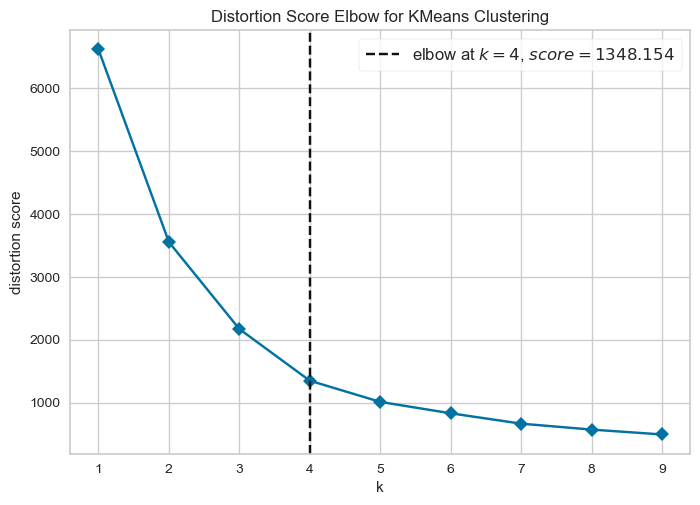

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(data_scaled[cols_for_clustering])        # Fit the data to the visualizer
visualizer.show()

# Model or Algorithm

In [57]:
model2 = KMeans(n_clusters=4,max_iter=100,random_state=42)

In [58]:
df['Cluster_Made'] = model2.fit_predict(data_scaled[cols_for_clustering])
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship,Cluster_Made
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,1,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,1


In [59]:
df.Cluster_Made = df.Cluster_Made.replace([0,1,2,3],['First Group','Second Group','Third Group','Fourth Group'])
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,In_relationship,Cluster_Made
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,First Group
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,Third Group
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,1,Fourth Group
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,Second Group
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,Second Group


### Final Cluster Centorids 

In [60]:
model2.cluster_centers_

array([[ 0.98691245,  1.05008716, -1.34762456],
       [-0.66298203, -0.7025084 ,  0.74204643],
       [-0.69004742, -0.7158961 , -1.34762456],
       [ 0.97664905,  1.02013554,  0.74204643]])

In [61]:
df.Cluster_Made.value_counts(ascending=False)

Cluster_Made
Second Group    856
Fourth Group    566
Third Group     453
First Group     330
Name: count, dtype: int64

# Business Submission

In [62]:
Submission = df.loc[:,['Income','Cluster_Made']]
Submission

,Income,Cluster_Made
0,58138.0,First Group
1,46344.0,Third Group
2,71613.0,Fourth Group
3,26646.0,Second Group
4,58293.0,Second Group
...,...,...
2200,61223.0,Fourth Group
2201,64014.0,Fourth Group
2202,56981.0,First Group
2203,69245.0,Fourth Group


# Finish